#**Banking dataset Assignment**

##**Libraries and Dataset import**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('banking_data_assignment.csv')
df

,Transaction Date,Account Number,Transaction Type,Amount,Description
0,2023-04-25,ACClOO7,Online Transfer,3708,Utilities
1,2023-12-03,ACClOO4,ATM Withdrawal,$3825,Online Purchase
2,2023-03-08,ACClOO3,Deposit,-160,Rent
3,2023-03-06,ACClOO7,Online Transfer,$4551,Groceries
4,2023-06-07,ACClOO3,Online Transfer,$-4605,Rent
...,...,...,...,...,...
158,2023-09-27,ACClOO2,Card Payment,4071,Rent
159,2023-11-02,ACClOO9,Card Payment,-3680,Groceries
160,2023-10-27,ACClOO7,Online Transfer,-636,Rent
161,2023-09-10,ACClOOO,Card Payment,-1112,Online Purchase


In [3]:
df.shape

(163, 5)

In [4]:
#checking the data types in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction Date  163 non-null    object
 1   Account Number    163 non-null    object
 2   Transaction Type  150 non-null    object
 3   Amount            163 non-null    object
 4   Description       150 non-null    object
dtypes: object(5)
memory usage: 6.5+ KB


In [5]:
# check null entries
df.isnull().sum()

Transaction Date     0
Account Number       0
Transaction Type    13
Amount               0
Description         13
dtype: int64

In [6]:
df['Transaction Type'].value_counts()

Card Payment       28
Online Transfer    25
Deposit            25
Withdrawal         25
Direct Debit       24
ATM Withdrawal     23
Name: Transaction Type, dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,Transaction Date,Account Number,Transaction Type,Amount,Description
8,2023-07-28,SUBTOTAL,NaN,-59.0,NaN
21,2023-05-28,SUBTOTAL,NaN,-16045.0,NaN
26,2023-03-28,SUBTOTAL,NaN,3283.0,NaN
57,2023-12-31,YEARLY TOTAL,NaN,-62124.0,NaN
71,2023-12-28,SUBTOTAL,NaN,-6214.0,NaN
79,2023-10-28,SUBTOTAL,NaN,4345.0,NaN
81,2023-02-28,SUBTOTAL,NaN,-6399.0,NaN
93,2023-04-28,SUBTOTAL,NaN,1584.0,NaN
98,2023-09-28,SUBTOTAL,NaN,-17563.0,NaN
132,2023-06-28,SUBTOTAL,NaN,-534.0,NaN


##**Task1:-**
**Data Cleaning:**

Correct OCR-like errors in account numbers and descriptions.

Normalize amount values to a consistent format, handling currency symbols and negative values for withdrawals.


In [8]:
df['Description'].value_counts()

Rent               32
Online Purchase    27
Transfer           25
Groceries          23
Salary             23
Utilities          20
Name: Description, dtype: int64

The 'Description' column does not have any OCR related error

In [9]:
df['Account Number'].value_counts()

ACClOO2         19
ACClOO4         18
ACClOO9         18
ACClOO7         16
ACClOOl         15
ACClOOO         15
ACClOO3         14
ACClOO6         14
SUBTOTAL        12
ACClOO5         12
ACClOO8          9
YEARLY TOTAL     1
Name: Account Number, dtype: int64

So we can see two types of OCR errors:-

1 has been scanned as 'l'

0 has been scanned as 'o'

In [10]:
# Correcting the OCR errors

df['Account Number'] = df['Account Number'].apply(lambda x: x.replace('l', '1').replace('o', '0'))


In [11]:
df['Account Number'].value_counts()

ACC1OO2         19
ACC1OO4         18
ACC1OO9         18
ACC1OO7         16
ACC1OO1         15
ACC1OOO         15
ACC1OO3         14
ACC1OO6         14
SUBTOTAL        12
ACC1OO5         12
ACC1OO8          9
YEARLY TOTAL     1
Name: Account Number, dtype: int64

In [12]:
# Normalize Amount values
df['Amount'] = df['Amount'].str.replace('$', '').str.replace(',', '').astype(float)
df['Amount'] = df['Amount'].apply(lambda x: -x if x < 0 else x)

In [13]:
#Cleaned Data
df

,Transaction Date,Account Number,Transaction Type,Amount,Description
0,2023-04-25,ACC1OO7,Online Transfer,3708.0,Utilities
1,2023-12-03,ACC1OO4,ATM Withdrawal,3825.0,Online Purchase
2,2023-03-08,ACC1OO3,Deposit,160.0,Rent
3,2023-03-06,ACC1OO7,Online Transfer,4551.0,Groceries
4,2023-06-07,ACC1OO3,Online Transfer,4605.0,Rent
...,...,...,...,...,...
158,2023-09-27,ACC1OO2,Card Payment,4071.0,Rent
159,2023-11-02,ACC1OO9,Card Payment,3680.0,Groceries
160,2023-10-27,ACC1OO7,Online Transfer,636.0,Rent
161,2023-09-10,ACC1OOO,Card Payment,1112.0,Online Purchase


## **Task 2:-**

**Data Analysis:-**

Identify and separate individual transactions from aggregated data (subtotals/yearly totals).

Reconcile transactions by ensuring the consistency of aggregated data with individual transactions.


In [14]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
# Identifying and separating individual transactions from aggregated data
individual_transactions = df[(df['Account Number'] != 'SUBTOTAL') & (df['Account Number'] != 'YEARLY TOTAL')]

# Identifying aggregated data (subtotals/yearly totals)
aggregated_yearly_data = df[df['Account Number'] == 'YEARLY TOTAL']
subtotal_data = df[df['Account Number'] == 'SUBTOTAL']


# Group by 'Transaction Date' and calculate the sum of all montlhy transactions for individual transactions
monthly_total = individual_transactions.groupby(individual_transactions['Transaction Date'].dt.to_period("M"))['Amount'].sum().reset_index()
monthly_total['Transaction Date'] = monthly_total['Transaction Date'].astype(str)

# check if monthly subtotal is correct
subtotal_data['Transaction Date'] = subtotal_data['Transaction Date'].dt.to_period("M").astype(str)

merged_data = monthly_total.merge(subtotal_data, on='Transaction Date', suffixes=('_indiv', '_subtotal'))
merged_data['Difference'] = merged_data['Amount_indiv'] - merged_data['Amount_subtotal']

merged_data

,Transaction Date,Amount_indiv,Account Number,Transaction Type,Amount_subtotal,Description,Difference
0,2023-01,39323.0,SUBTOTAL,NaN,15729.0,NaN,23594.0
1,2023-02,39303.0,SUBTOTAL,NaN,6399.0,NaN,32904.0
2,2023-03,23621.0,SUBTOTAL,NaN,3283.0,NaN,20338.0
3,2023-04,21844.0,SUBTOTAL,NaN,1584.0,NaN,20260.0
4,2023-05,36215.0,SUBTOTAL,NaN,16045.0,NaN,20170.0
5,2023-06,22598.0,SUBTOTAL,NaN,534.0,NaN,22064.0
6,2023-07,38109.0,SUBTOTAL,NaN,59.0,NaN,38050.0
7,2023-08,37343.0,SUBTOTAL,NaN,5849.0,NaN,31494.0
8,2023-09,40389.0,SUBTOTAL,NaN,17563.0,NaN,22826.0
9,2023-10,18975.0,SUBTOTAL,NaN,4345.0,NaN,14630.0


Here we can see that the difference between individual amount and monthly subtotal amount is zero. So the monthly subtotal amount is accurate.

## **Task 3:-**

**Anomaly Detection:**

Detect and flag any unusual transactions that could indicate errors or fraudulent activity based on criteria such as unusually high transaction amounts.


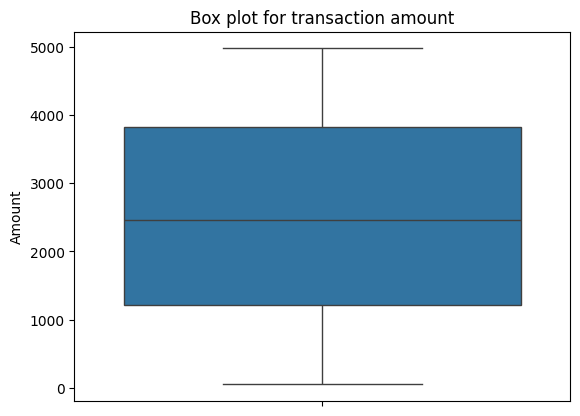

In [22]:
# check for outliers in the Amount column
individual_transactions = df[(df['Account Number'] != 'SUBTOTAL') & (df['Account Number'] != 'YEARLY TOTAL')]
sns.boxplot(individual_transactions['Amount'])
plt.title('Box plot for transaction amount')
plt.show()

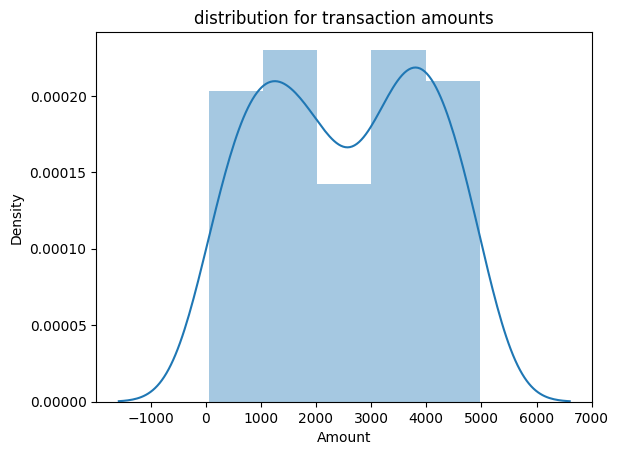

In [23]:
individual_transactions= df[(df['Account Number'] != 'SUBTOTAL') & (df['Account Number'] != 'YEARLY TOTAL')]
sns.distplot(individual_transactions['Amount'])
plt.title('distribution for transaction amounts')
plt.show()

In [25]:
# Calculate the first (Q1) and third (Q3) quartiles
Q1 = individual_transactions['Amount'].quantile(0.25)
Q3 = individual_transactions['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# show outliers
outliers = individual_transactions[(individual_transactions['Amount'] < lower_bound) | (individual_transactions['Amount'] > upper_bound)]
df

,Transaction Date,Account Number,Transaction Type,Amount,Description,Flagged
0,2023-04-25,ACC1OO7,Online Transfer,3708.0,Utilities,No
1,2023-12-03,ACC1OO4,ATM Withdrawal,3825.0,Online Purchase,No
2,2023-03-08,ACC1OO3,Deposit,160.0,Rent,No
3,2023-03-06,ACC1OO7,Online Transfer,4551.0,Groceries,No
4,2023-06-07,ACC1OO3,Online Transfer,4605.0,Rent,No
...,...,...,...,...,...,...
158,2023-09-27,ACC1OO2,Card Payment,4071.0,Rent,No
159,2023-11-02,ACC1OO9,Card Payment,3680.0,Groceries,No
160,2023-10-27,ACC1OO7,Online Transfer,636.0,Rent,No
161,2023-09-10,ACC1OOO,Card Payment,1112.0,Online Purchase,No


## Task 4:-

**Report:-**

**Data Cleaning Summary:**

Corrected OCR-like errors in account numbers. Descriptions columns did not have OCR errors.
Normalized amount values across transactions, handling currency symbols and negative values.

**Data Analysis Summary:**

Individual transactions were separated from aggregated data.
No discrepancies were found in transaction reconciliation.

**Anomaly Detection Summary:**

There were no unusual transactions based on amount criteria.